# Diabetes Prediction With Python  

### Yahia Chammami 

The objective of this project is to diagnostically determine a person's likelihood of
having diabetes. A person is diabetic or not depends on these features
independently because there the outcome is not dependent on combined relation
between features. It completely dependent on independent values. So all the
features are independently contributing the outcome.

And Doctors are going to consider these features independently to tell a patient is diabetic or not and prescribe medicines.

## Importing Required Libraries :

In [338]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error,confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [339]:
# Loading And Reading Dataset
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Feature Information :

• Pregnancies: Number of times pregnant

• Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

• BloodPressure: Diastolic blood pressure (mm Hg)

• SkinThickness: Triceps skin fold thickness (mm)

• Insulin: 2-Hour serum insulin (mu U/ml) >> Insulin level

• BMI: Body mass index (weight in kg/(height in m)^2)

• DiabetesPedigreeFunction: Diabetes pedigree function

•Age: Age (years)

• Outcome: Class variable (have the disease (1) or not (0))

In [340]:
# Basic Operations
data.shape

(768, 9)

In [341]:
# Checking the basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [342]:
# Checking the duplicate Records
data.duplicated().sum()

0

#### Report :

• There are 9 Columns and 768 Rows in the dataset .

• There is no Missing values and all the data is Categorical .

• BMI and DiabetesPedigreeFunction are of float type and rest all are of int type .

• There is no Duplicate values .


## Statistical analysis :

In [343]:
# Description of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [344]:
# Checking the Number of zero value
zero_features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = data['Glucose'].count()

for feature in zero_features:
 zero_count = data[data[feature]==0][feature].count()
 print('Number of cases of 0 in {0} is {1}, Percentage is {2:.2f} %'.format(feature, zero_count, zero_count*100/total_count))


Number of cases of 0 in Glucose is 5, Percentage is 0.65 %
Number of cases of 0 in BloodPressure is 35, Percentage is 4.56 %
Number of cases of 0 in SkinThickness is 227, Percentage is 29.56 %
Number of cases of 0 in Insulin is 374, Percentage is 48.70 %
Number of cases of 0 in BMI is 11, Percentage is 1.43 %


#### Report :


• In the first 4 features and the last one, the mean is close to the median (50%), in this situation the distribution is approximately symmetric and normally distributed.

• For the rest of the features, the distribution of the data is skewed.

• There is no missing values in the dataset, but we cannot ignore the percentage of 0 values in Glucose, BloodPressure, SkinThickness, Insulin, BMI. 

• In SkinThickness and Insulin especially percentage of 0 value is high, So we will replace the 0 values with the mean.


In [345]:
# Replacing the 0 values with the mean 
data_mean = data[zero_features].mean()
data[zero_features] = data[zero_features].replace(0, data_mean)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

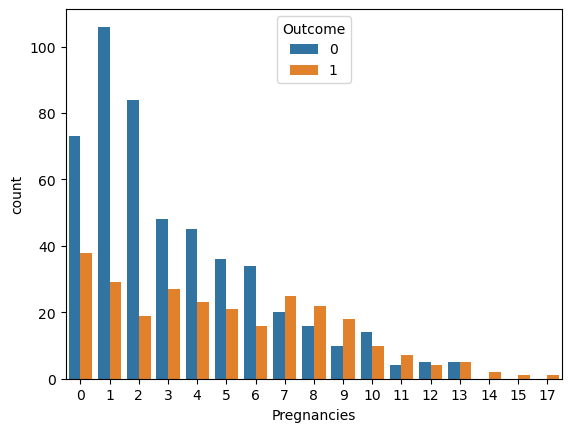

In [346]:
# Analysis: Pregnancies and Outcome
sns.countplot(data= data, x='Pregnancies', hue='Outcome')

#### Report 

• Women with with 0-3 times pregnancies are having the least chance to be diabetic.

• Women with less than 6 times pregnancies are less likely to be diabetic.

• Women with more than than 6 times pregnancies are more likely to be diabetic.

• Women having 14 and above times pregnancies are having the maximum chance to
be diabetic

<AxesSubplot:xlabel='Age', ylabel='count'>

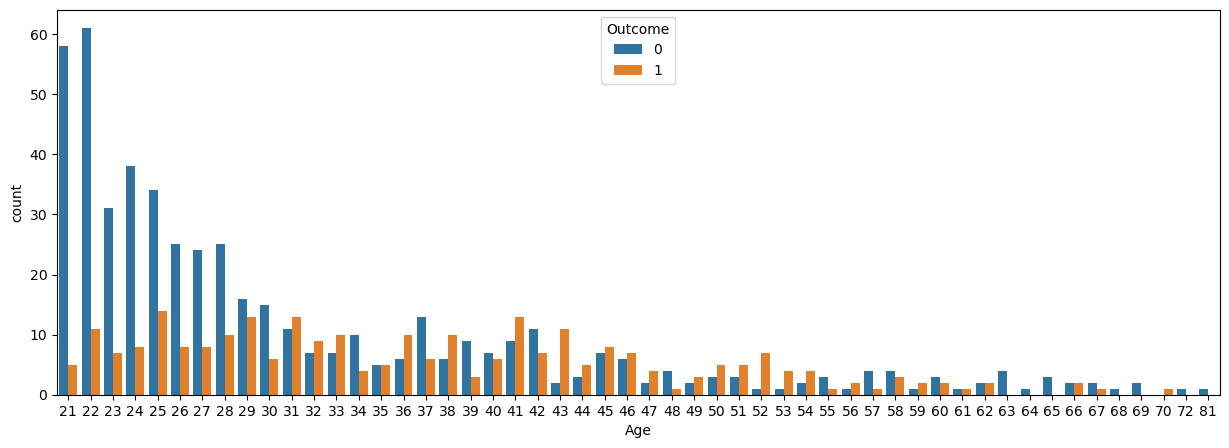

In [347]:
# Analysis: Age and Outcome
plt.figure(figsize=(15,5))
sns.countplot(data= data, x='Age', hue='Outcome')

#### Report

• Women under age 30 are less likely to be diabetic.

• Women in an age group between 31-54 are have more likely to be diabetic.

• Women with age more than 55 are less likely to be diabetic.

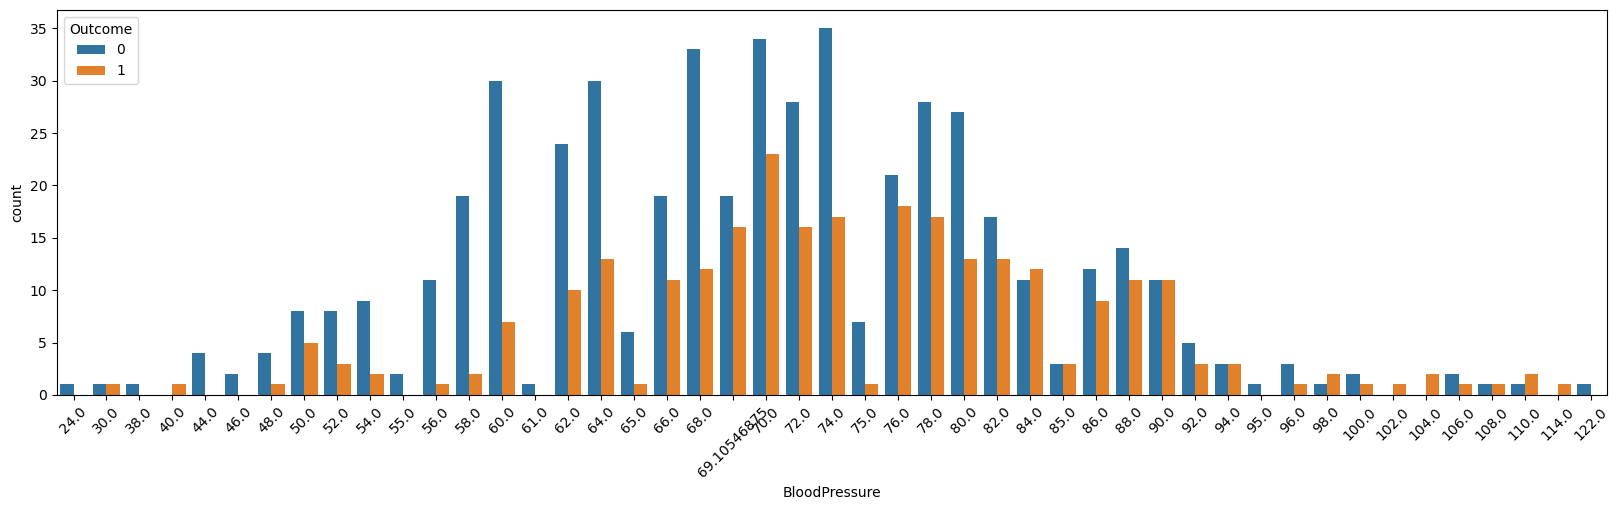

In [348]:
# Analysis: BloodPressure and Outcome
plt.figure(figsize=(20,5))
sns.countplot(data= data, x='BloodPressure', hue='Outcome')
plt.xticks(rotation=45)
plt.show()

#### Report

• Women having BloodPressure less than 84 are very low chance to be diabetic.

• Women having BlodPressure 84 and more are more likely to be diabetic.

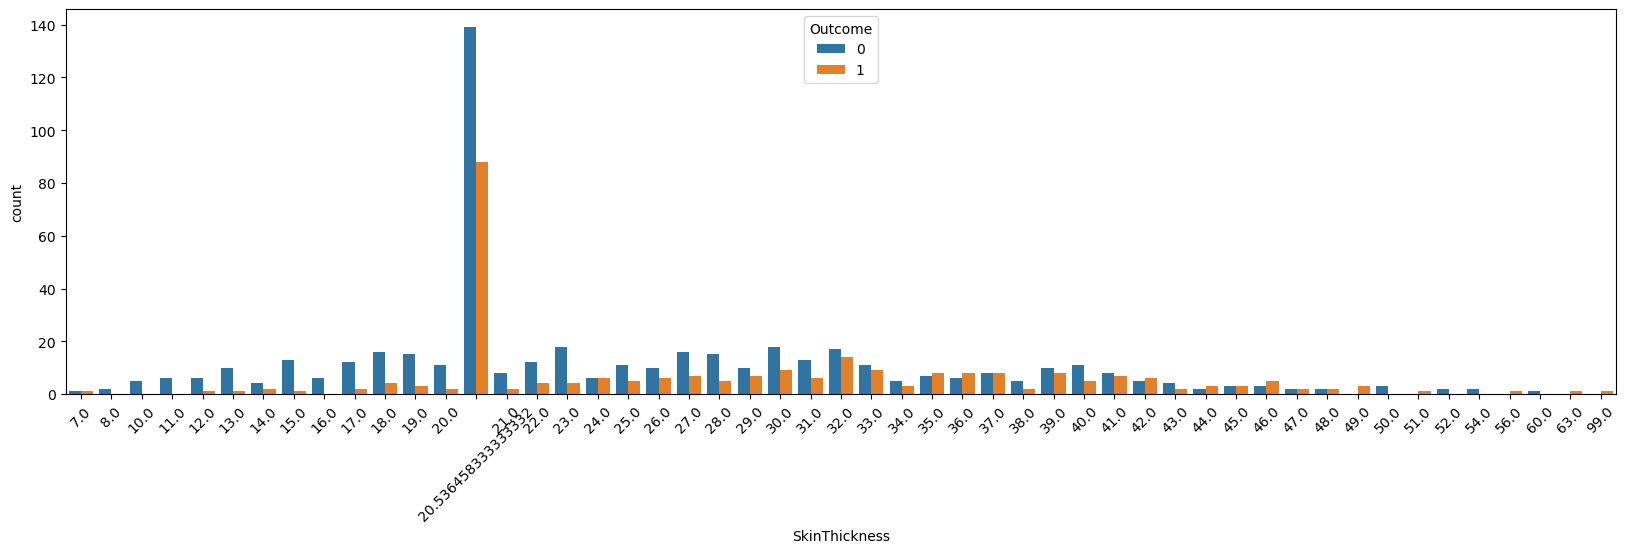

In [349]:
# Analysis: SkinThickness and Outcome
plt.figure(figsize=(20,5))
sns.countplot(data= data, x='SkinThickness', hue='Outcome')
plt.xticks(rotation=45)
plt.show()

#### Report

• Women having SkinThickness less than 35 have low chance to be diabetic.

• Women having SkinThickness 35 and more are more likely to be diabetic.

<AxesSubplot:>

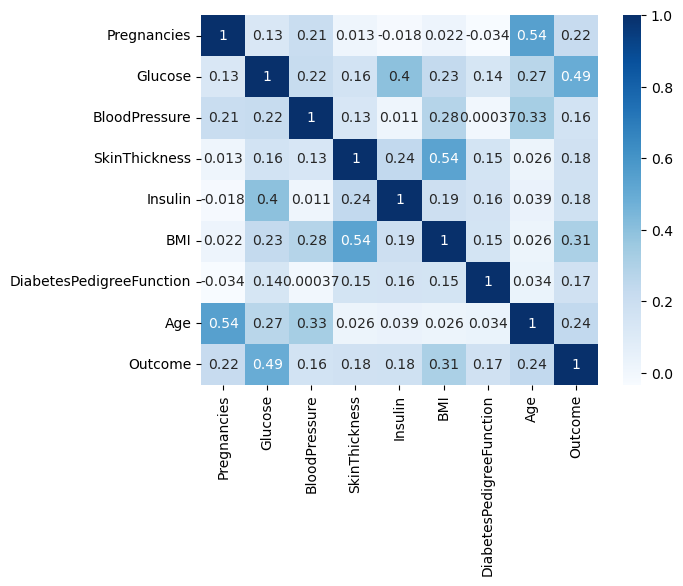

In [350]:
# Correlation Analysis
sns.heatmap(data=data.corr(), annot=True, cmap='Blues')

#### Report

•There is not much correlation between features.

## Preprocessing :

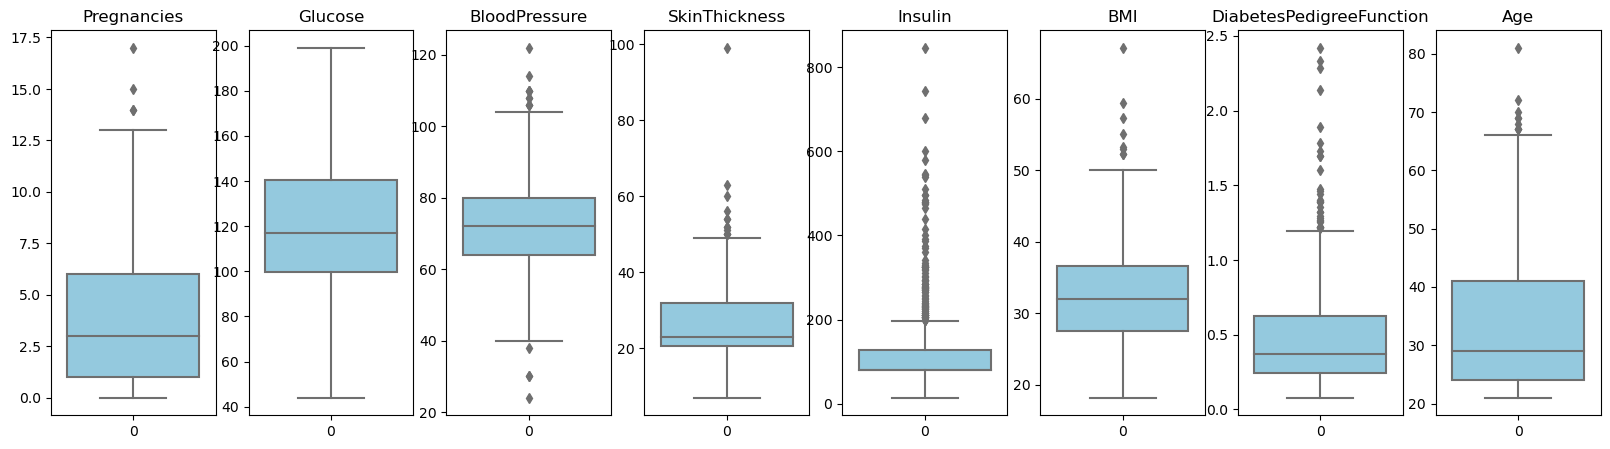

In [351]:
# Checking outliers
vars = data.drop(["Outcome"], axis = 1).columns

fig, axs = plt.subplots(1, len(vars), figsize=(20, 5))

for i, var in enumerate(vars):
    sns.boxplot(data=data[var], ax=axs[i], color="skyblue")
    axs[i].set_title(var)

#### Report

• Pregnancies has outliers in the right side of the distribution.

• BloodPressure has outliers in both side of the distribution.

• SkinThickness has outliers in the right side of the distribution.

• Insulin has outliers in the right side of distribution.

• BMI has outliers in the right side of the distribution.

• DiabetesPedigreeFunction has outliers in the right side of distribution.

• Age group has outliers in the right side of the distribution.

##### As we see, most of the features has outliers except Glucose, So we need to keep that in mind when we scale our dataset .

In [352]:
# Splitting Data
x = data.drop(columns='Outcome')
y= data.Outcome

In [353]:
# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.25, random_state=30)

##### We should perform features scaling with RobustScaler beceause it's less sensitive to outliers .

In [354]:
# Features Scaling with RobustScaler
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Machine Learning Models :

- Linear Support Vector Machines Classification
- Gaussian Naive Bays
- K_Nearst Neighbors
- Logistic Regression
- Ridge Classification
- Random Forest
- Decision Tree Classifier

##### Accuracy : Is the metric to evaluate how correcct the model is to predict the values.
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)

##### Precision : Out of all actual values, how many are correctly predicted
Precision = true_positive/(true_positive+false_positive)

##### Recall : From all the predicted values how many are correctly predicted.
Recall = true_positive/(true_positive+false_negative)

##### F1 score : Is the best choice if your distrubution is uneven. 
F1_score = 2*(Recall * Precision)/(Recall + Precision)

### Support Vector Machines

In [355]:
# Linear Support Vector Machines Classification
SVM = LinearSVC(max_iter=10000)
SVM.fit(x_train_scaled, y_train)
y_pred = SVM.predict(x_test_scaled)


In [356]:
print('Error Metrics\n\n',classification_report(y_test, y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



In [357]:
# Accuracy Score
print(f'Training score of the SVM model is : {round(SVM.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy score of the SVM model is : {round(round(accuracy_score(y_test, y_pred),4)*100,3)} %')
print(f'Mean Absolute Error MAE of the SVM model is : {round (mean_absolute_error(y_test, y_pred),3)*100} %')
print(f'Mean Squared Error MSE of the SVM model is : {round (mean_squared_error(y_test, y_pred),3)*100} %')

Training score of the SVM model is : 77.3 %
Accuracy score of the SVM model is : 78.65 %
Mean Absolute Error MAE of the SVM model is : 21.4 %
Mean Squared Error MSE of the SVM model is : 21.4 %


In [358]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 114 
True Negative: 37 
False Negative: 25 
FalsePositive: 16


<AxesSubplot:>

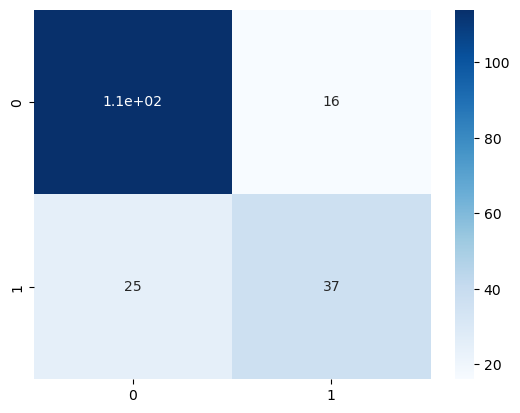

In [359]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

### Gaussian Naive Bays


In [360]:
# Gaussian Naive Bays
GNB = GaussianNB()
GNB.fit(x_train_scaled, y_train)
y_pred = GNB.predict(x_test_scaled)

In [361]:
print('Error Metrics\n\n',classification_report(y_test, y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.81      0.86      0.84       130
           1       0.67      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



In [362]:
# Accuracy Score
print(f'Training score of the GNB model is : {round(GNB.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy score of the GNB model is : {round(accuracy_score(y_test, y_pred),4)*100} %')
print(f'Mean Absolute Error MAE of the GNB model is : {round(round (mean_absolute_error(y_test, y_pred),3)*100,3)} %')
print(f'Mean Squared Error MSE of the GNB model is : {round(round(mean_squared_error(y_test, y_pred),3)*100,3)} %')

Training score of the GNB model is : 74.8 %
Accuracy score of the GNB model is : 77.08 %
Mean Absolute Error MAE of the GNB model is : 22.9 %
Mean Squared Error MSE of the GNB model is : 22.9 %


In [363]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 112 
True Negative: 36 
False Negative: 26 
FalsePositive: 18


<AxesSubplot:>

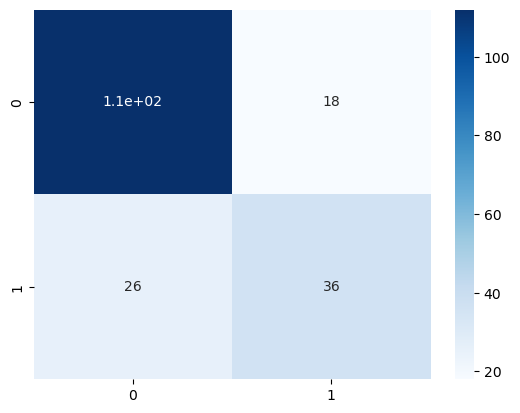

In [364]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

### K_Nearst Neighbors

In [365]:
# K_Nearst Neighbors
KNN = KNeighborsClassifier()
KNN.fit(x_train_scaled, y_train)
y_pred = KNN.predict(x_test_scaled)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [366]:
print('Error Metrics\n\n',classification_report(y_test, y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       130
           1       0.63      0.60      0.61        62

    accuracy                           0.76       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [367]:
# Accuracy Score
print(f'Training score of the KNN model is : {round(round(KNN.score(x_train_scaled, y_train),3)*100,3)} %')
print(f'Accuracy score of the KNN model is : {round(accuracy_score(y_test, y_pred),4)*100} %')
print(f'Mean Absolute Error MAE of the KNN model is : {round(round (mean_absolute_error(y_test, y_pred),3)*100,3)} %')
print(f'Mean Squared Error MSE of the KNN model is : {round(round(mean_squared_error(y_test, y_pred),3)*100,3)} %')

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training score of the KNN model is : 81.4 %
Accuracy score of the KNN model is : 75.52 %
Mean Absolute Error MAE of the KNN model is : 24.5 %
Mean Squared Error MSE of the KNN model is : 24.5 %


In [368]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 108 
True Negative: 37 
False Negative: 25 
FalsePositive: 22


<AxesSubplot:>

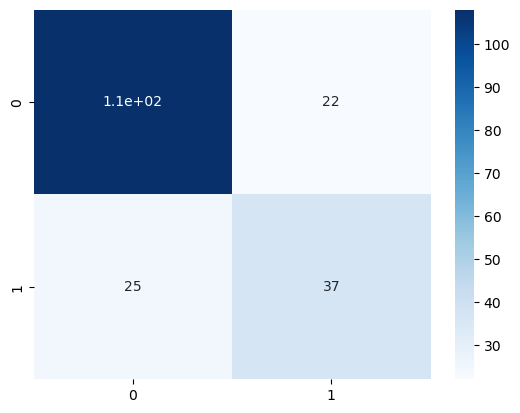

In [369]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

### Logistic Regression

In [370]:
LR = LogisticRegression()
LR.fit(x_train_scaled, y_train)
y_pred = LR.predict(x_test_scaled)

In [371]:
print('Error Metrics\n\n',classification_report(y_test, y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



In [372]:
# Accuracy Score
print(f'Training score of the LR model is : {round(LR.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy score of the LR model is : {round(round(accuracy_score(y_test, y_pred),4)*100,3)} %')
print(f'Mean Absolute Error MAE of the LR model is : {round (mean_absolute_error(y_test, y_pred),3)*100} %')
print(f'Mean Squared Error MSE of the LR model is : {round(mean_squared_error(y_test, y_pred),3)*100} %')

Training score of the LR model is : 77.4 %
Accuracy score of the LR model is : 78.65 %
Mean Absolute Error MAE of the LR model is : 21.4 %
Mean Squared Error MSE of the LR model is : 21.4 %


In [373]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 114 
True Negative: 37 
False Negative: 25 
FalsePositive: 16


<AxesSubplot:>

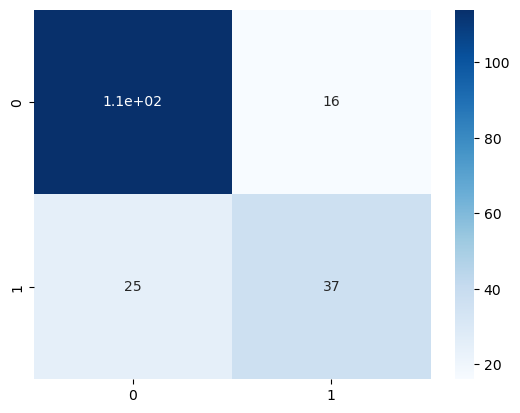

In [374]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

### Ridge Classification

In [375]:
# Ridge Classification
RC = RidgeClassifier()
RC.fit(x_train_scaled, y_train)
y_pred = RC.predict(x_test_scaled)

In [376]:
print('Error Metrics\n\n',classification_report(y_test, y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



In [377]:
# Accuracy Score
print(f'Training score of the RC model is : {round(RC.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy score of the RC model is : {round(round(accuracy_score(y_test, y_pred),4)*100,3)} %')
print(f'Mean Absolute Error MAE of the RC model is : {round (mean_absolute_error(y_test, y_pred),3)*100} %')
print(f'Mean Squared Error MSE of the RC model is : {round(mean_squared_error(y_test, y_pred),3)*100} %')

Training score of the RC model is : 77.3 %
Accuracy score of the RC model is : 78.65 %
Mean Absolute Error MAE of the RC model is : 21.4 %
Mean Squared Error MSE of the RC model is : 21.4 %


In [378]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 114 
True Negative: 37 
False Negative: 25 
FalsePositive: 16


<AxesSubplot:>

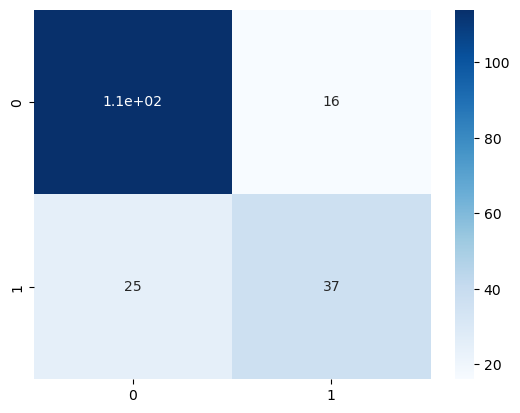

In [379]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

### Random Forest

In [380]:
# Random Forest
RF = RandomForestClassifier()
RF.fit(x_train_scaled, y_train)
y_pred = RF.predict(x_test_scaled)

In [381]:
print('Error Metrics\n\n',classification_report(y_test, y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       130
           1       0.68      0.61      0.64        62

    accuracy                           0.78       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.78      0.78      0.78       192



In [382]:
# Accuracy Score
print(f'Training score of the RF model is : {round(RF.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy score of the RF model is : {round(round(accuracy_score(y_test, y_pred),4)*100,3)} %')
print(f'Mean Absolute Error MAE of the RF model is : {round(round (mean_absolute_error(y_test, y_pred),3)*100,3)} %')
print(f'Mean Squared Error MSE of the RF model is : {round(round(mean_squared_error(y_test, y_pred),3)*100,3)} %')

Training score of the RF model is : 100.0 %
Accuracy score of the RF model is : 78.12 %
Mean Absolute Error MAE of the RF model is : 21.9 %
Mean Squared Error MSE of the RF model is : 21.9 %


In [383]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 112 
True Negative: 38 
False Negative: 24 
FalsePositive: 18


<AxesSubplot:>

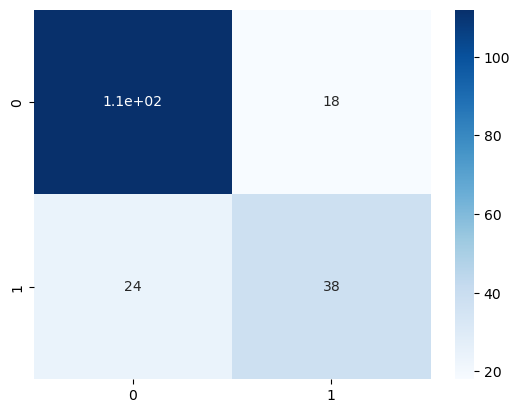

In [384]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

### Decision Tree Classifier

In [385]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train_scaled, y_train)
y_pred = DTC.predict(x_test_scaled)

In [386]:
print('Error Metrics\n\n',classification_report(y_test, y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.80      0.75      0.77       130
           1       0.54      0.61      0.57        62

    accuracy                           0.70       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.72      0.70      0.71       192



In [387]:
# Accuracy Score
print(f'Training score of the DTC model is : {round(DTC.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy score of the DTC model is : {round(round(accuracy_score(y_test, y_pred),4)*100,3)} %')
print(f'Mean Absolute Error MAE of the DTC model is : {round (mean_absolute_error(y_test, y_pred),3)*100} %')
print(f'Mean Squared Error MSE of the DTC model is : {round(mean_squared_error(y_test, y_pred),3)*100} %')

Training score of the DTC model is : 100.0 %
Accuracy score of the DTC model is : 70.31 %
Mean Absolute Error MAE of the DTC model is : 29.7 %
Mean Squared Error MSE of the DTC model is : 29.7 %


In [388]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 97 
True Negative: 38 
False Negative: 24 
FalsePositive: 33


<AxesSubplot:>

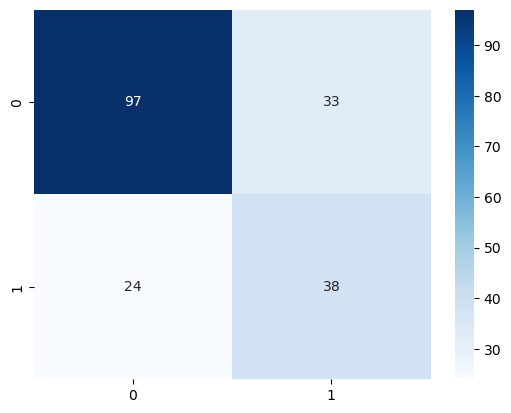

In [389]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

## Conclusion :
#### Ridge_Classifier and Logistic_Regression have the best result for classifying diabetics 